In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
customers = pd.read_csv('Mall_Customers.csv')

In [6]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customers.shape

(200, 5)

In [8]:
customers.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
customers.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
customers.isnull().sum(axis = 1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


In [11]:
customers.isnull().sum(axis = 1) > 0

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [12]:
customers.duplicated().sum()

np.int64(0)

In [13]:
customers.drop_duplicates(inplace = True)

In [14]:
customers.drop(columns = 'CustomerID', inplace = True)

In [15]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [50]:
X=customers[['Annual Income (k$)','Spending Score (1-100)','Age']]

In [51]:
X

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(X)

In [53]:
wcss = []

for i in range(1, 8):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)

  print(kmeans.inertia_)
  wcss.append(kmeans.inertia_)

600.0
389.38618895643714
295.4562449213557
205.22514747675913
169.89149793438568
134.35277477401493
121.38935022502866


In [54]:
wcss

[600.0,
 389.38618895643714,
 295.4562449213557,
 205.22514747675913,
 169.89149793438568,
 134.35277477401493,
 121.38935022502866]

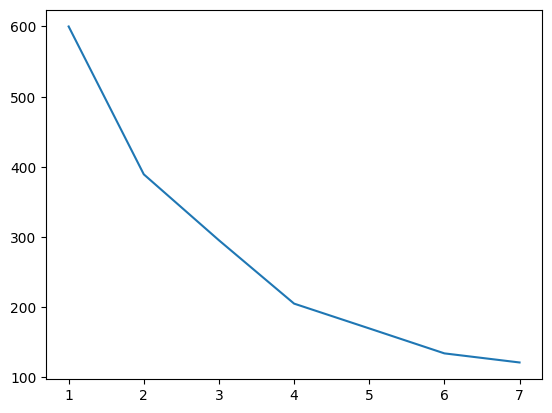

In [55]:
plt.plot(range(1, 8), wcss)
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [84]:
print(kmeans.cluster_centers_)

[[-0.49056525 -0.39717443  1.08616125]
 [ 0.97484722  1.21608539 -0.42880597]
 [-0.78476346  0.39202966 -0.96249203]
 [ 0.99011499 -1.18875705  0.03720536]]


In [85]:
y = kmeans.predict(x)

In [86]:
y

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [87]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [88]:
final_data=pd.concat([customers, output], axis = 1)

In [89]:
final_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [90]:
final_data.to_csv('final_data.csv')

In [91]:
from sklearn.metrics import silhouette_score

silhouette_score(x, y)

np.float64(0.4039582785148566)

In [93]:
X['Cluster'] = y
X.groupby('Cluster').mean()

,Annual Income (k$),Spending Score (1-100),Age
Cluster,,,
0,47.707692,39.969231,53.984615
1,86.100000,81.525000,32.875000
2,40.000000,60.298246,25.438596
3,86.500000,19.578947,39.368421
